In [1]:
import time
#from tqdm import *
import random
from math import *
import operator
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
"""
5. Number of Instances: 214
6. Number of Attributes: 10 (including an Id#) plus the class attribute
   -- all attributes are continuously valued
7. Attribute Information:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps

9. Class Distribution: (out of 214 total instances)
    -- 163 Window glass (building windows and vehicle windows)
       -- 87 float processed  
          -- 70 building windows
          -- 17 vehicle windows
       -- 76 non-float processed
          -- 76 building windows
          -- 0 vehicle windows
    -- 51 Non-window glass
       -- 13 containers
       -- 9 tableware
       -- 29 headlamps
"""

'\n5. Number of Instances: 214\n6. Number of Attributes: 10 (including an Id#) plus the class attribute\n   -- all attributes are continuously valued\n7. Attribute Information:\n   1. Id number: 1 to 214\n   2. RI: refractive index\n   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as \n                  are attributes 4-10)\n   4. Mg: Magnesium\n   5. Al: Aluminum\n   6. Si: Silicon\n   7. K: Potassium\n   8. Ca: Calcium\n   9. Ba: Barium\n  10. Fe: Iron\n  11. Type of glass: (class attribute)\n      -- 1 building_windows_float_processed\n      -- 2 building_windows_non_float_processed\n      -- 3 vehicle_windows_float_processed\n      -- 4 vehicle_windows_non_float_processed (none in this database)\n      -- 5 containers\n      -- 6 tableware\n      -- 7 headlamps\n\n9. Class Distribution: (out of 214 total instances)\n    -- 163 Window glass (building windows and vehicle windows)\n       -- 87 float processed  \n          -- 70 building windows\n          --

In [2]:
location = r"C:\Users\User\Desktop\Machine Learning\datasets\glass.csv"

In [3]:
# load the training data from glass data set
df_training = pd.read_csv(location)

In [4]:
df_training.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
# Question: Pretend that we want to predict ri, and our only feature is al. 
# How could we do it using machine learning?

# Answer: We could frame it as a regression problem, and use a linear 
#         regression model with al as the only feature and ri as the 
#         response.

# Question: How would we visualize this model?

# Answer: Create a scatter plot with al on the x-axis and ri on the y-axis, 
#         and draw the line of best fit.

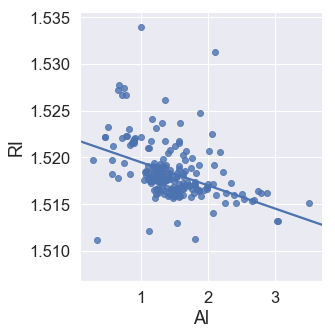

In [5]:
sns.lmplot(x='Al', y='RI', data=df_training, ci=None)

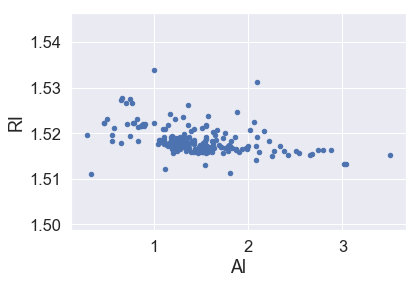

In [6]:
# Question: How would we draw this plot without using Seaborn?

# scatter plot using Pandas
df_training.plot(kind='scatter', x='Al', y='RI')

In [9]:
# examine glass_type
df_training.Type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

In [5]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
df_training['household'] = df_training.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})

df_training.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


In [8]:
df_training.household.value_counts()

0    163
1     51
Name: household, dtype: int64

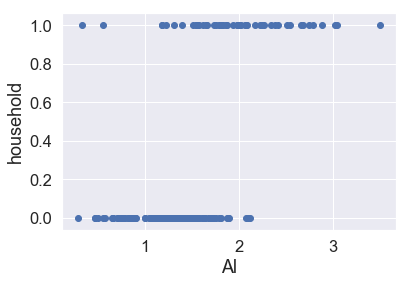

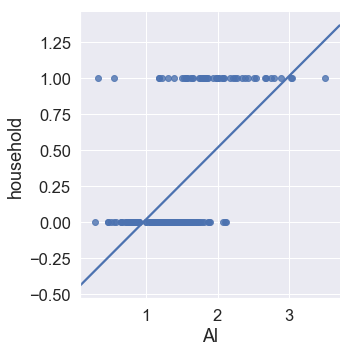

In [7]:
plt.scatter(df_training.Al, df_training.household)
plt.xlabel('Al')
plt.ylabel('household')

sns.lmplot(x='Al', y='household', data=df_training, ci=None)

In [8]:
# fit a linear regression model and store the predictions
linreg = LinearRegression()
feature_cols = ['Al']

X = df_training[feature_cols]

y = df_training.household

linreg.fit(X, y)

df_training['household_pred'] = linreg.predict(X)

Text(0, 0.5, 'household')

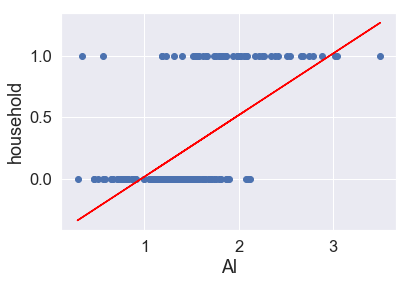

In [9]:
# scatter plot that includes the regression line
plt.scatter(df_training.Al, df_training.household)

plt.plot(df_training.Al, df_training.household_pred, color='red')

plt.xlabel('Al')
plt.ylabel('household')

In [14]:
# If al=3, what class do we predict for household? 1

# If al=1.5, what class do we predict for household? 0

# We predict the 0 class for lower values of al, and 
# the 1 class for higher values of al. 
# What's our cutoff value? 
# Around al=2, because that's where the linear regression line crosses 
# the midpoint between predicting class 0 and class 1.

# Therefore, we'll say that if household_pred >= 0.5, 
# we predict a class of 1, else we predict a class of 0.